In [1]:
import pandas as pd
import numpy as np
import pyflux as pf
from matplotlib import pyplot as plt

In [2]:
for i in range(0,1):
    link_name = "link_travel_time\link_" + str(i) + ".csv"
    data = pd.read_csv(link_name)

In [3]:
for j in range(0,32):
    dta = data.iloc[:,j]
    dta.index = pd.Index(pd.date_range('7/'+ str(j) +'/2012 08:00',periods=240, freq='Min'))

ValueError: could not convert string to Timestamp

In [ ]:
dta.plot(figsize=(15,5))
plt.ylabel('Traffic Flow')
plt.title('Daily Traffic Flow Data')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
test_stationarity(dta)

Normal ARIMA(1,2,0)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Differenced Series      Method: MLE                                       
Start Date: 1                                           Log Likelihood: 144.9128                          
End Date: 239                                           AIC: -283.8256                                    
Number of observations: 237                             BIC: -273.4214                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 -0.0002    0.0085     -0.0289  0.977    (-0.017 | 0.0165)        
AR(1)                                

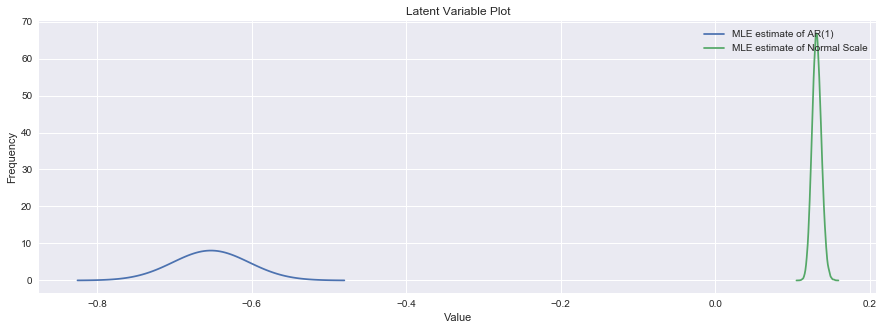

In [49]:
model = pf.ARIMA(data=dta.values,ar=1,ma=0,integ=2)
x = model.fit("MLE")
x.summary()
model.plot_z(indices=range(1,9))

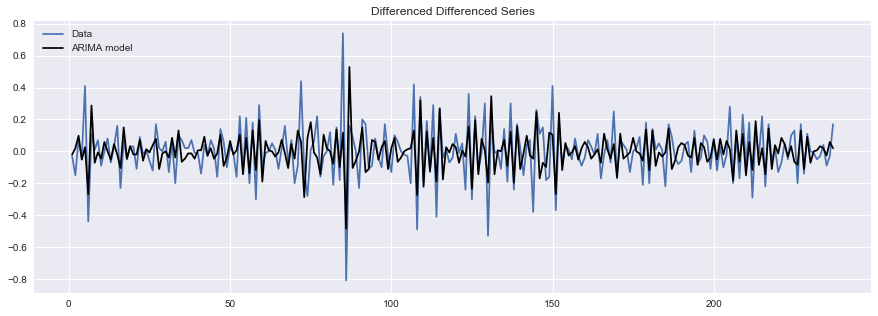

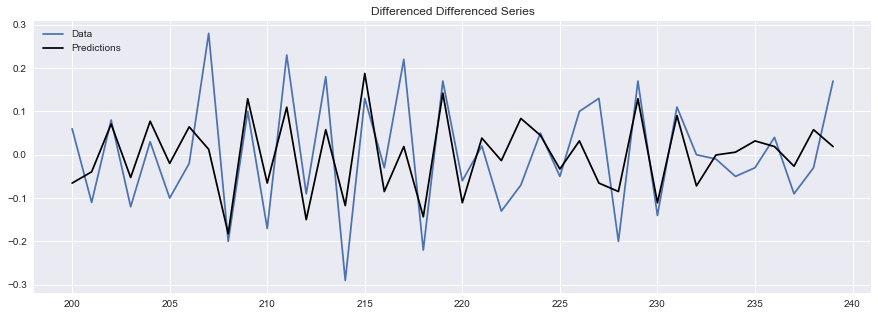

In [51]:
model.plot_fit(figsize=(15,5))
model.plot_predict_is(40,figsize=(15,5))

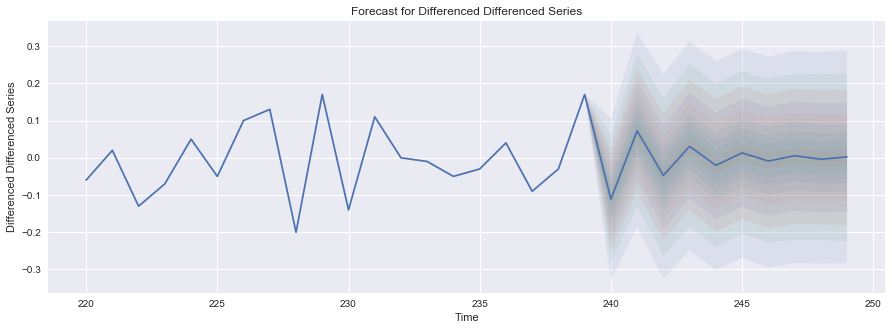

In [54]:
model.plot_predict(h=10,past_values=20,figsize=(15,5))